In [5]:
# MACHINE LEARNING OPGAVE WEEK 2

import numpy as np
from random import randint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import sys
import pickle

from uitwerkingen import *

Helperfuncties die nodig zijn om de boel te laten werken
Hier hoef je niets aan te veranderen, maar bestudeer de code om een beeld te krijgen van de werking hiervan.

In [6]:

def initialize_random_weights(in_conn, out_conn):
    W = np.zeros((out_conn, 1 + out_conn))
    epsilon_init = 0.12
    W = np.random.rand(out_conn, 1+in_conn) * 2 * epsilon_init - epsilon_init
    return W

def display_data(X):
    m,n = X.shape
    for idx in range(0, m):
        plt.subplot(5, 5, idx+1)
        x = X[idx,:].reshape(20,20)
        plt.tick_params(which='both',left=False, bottom=False, top=False, labelleft=False, labelbottom=False)
        plt.imshow(x, cmap='gray', interpolation='nearest');

    plt.show()

itr = 1
def callbackF(Xi):
    global itr
    print (f"iteration {itr}")
    itr += 1


def nn_cost_function(Thetas, X, y):
    global input_layer_size, hidden_layer_size, num_labels
    size = hidden_layer_size * (1+input_layer_size) # +1 want de bias-node zit wel in de matrix
    Theta1 = Thetas[:size].reshape(hidden_layer_size, input_layer_size+1)
    Theta2 = Thetas[size:].reshape(num_labels, hidden_layer_size+1)
    J = compute_cost(Theta1, Theta2, X, y)
    grad1, grad2 = nn_check_gradients(Theta1, Theta2, X, y)
    return J, np.concatenate( (grad1.flatten(), grad2.flatten()) ) 


In [7]:
#Laden van de data en zetten van de variabelen.
with open ('week2_data.pkl','rb') as f:
    data = pickle.load(f)

X,y = data['X'], data['y']

#Zetten van belangrijke variabelen
m,n = X.shape # aantal datapunten in de trainingsset
input_layer_size  = 400;  # 20x20 input plaatjes van getallen
hidden_layer_size = 25;   # verborgen laag van 25 units
num_labels = 10;          # 10 labels, 1 tot en met 10
                          # let op: '0' wordt opgeslagen als label 10.

# ========================  OPGAVE 1 ======================== 

Tekenen van data op regel 114
Dit zou een 0 moeten zijn.


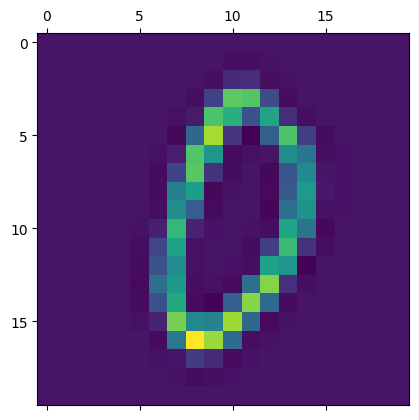

In [8]:

rnd = randint(0, X.shape[0])
print (f"Tekenen van data op regel {rnd}")
if (len(sys.argv)>1 and sys.argv[1]=='skip') :
    print ("Slaan we over")
else:
    hyp = y[rnd]
    if (hyp==10): hyp=0
    print (f"Dit zou een {hyp} moeten zijn.")
    plot_number(X[rnd,:])

# input ("Druk op Return om verder te gaan...") 

# ========================  OPGAVE 2a ======================== 


In [9]:
print ("")
print ("Sigmoid-functie met een relatief groot negatief getal zou bijna 0 moeten zijn")
print (f"Sigmoid van -10 = {sigmoid(-10)}")

print ("Sigmoid-functie van 0 zou 0,5 moeten zijn.")
print (f"Sigmoid van 0 = {sigmoid(0)}")

print ("Sigmoid-functie met een relatief groot positief getal zou bijna 1 moeten zijn")
print (f"Sigmoid van 10 = {sigmoid(10)}")

print ("Simoid aangeroepen met 1×3 vector [-10, 0, 10]")
print (sigmoid(np.matrix( [-10, 0, 10] )))
print ("Simoid aangeroepen met 3×1 vector [-10, 0, 10]")
print (sigmoid(np.matrix( ([-10], [0], [10]) )))

# input ("Druk op Return om verder te gaan...") 


Sigmoid-functie met een relatief groot negatief getal zou bijna 0 moeten zijn
Sigmoid van -10 = 4.5397868702434395e-05
Sigmoid-functie van 0 zou 0,5 moeten zijn.
Sigmoid van 0 = 0.5
Sigmoid-functie met een relatief groot positief getal zou bijna 1 moeten zijn
Sigmoid van 10 = 0.9999546021312976
Simoid aangeroepen met 1×3 vector [-10, 0, 10]
[[4.53978687e-05 5.00000000e-01 9.99954602e-01]]
Simoid aangeroepen met 3×1 vector [-10, 0, 10]
[[4.53978687e-05]
 [5.00000000e-01]
 [9.99954602e-01]]


# ========================  OPGAVE 2b ======================== 

In [10]:
print ("")
print ("Aanroepen van de methode predict_number met de y-vector")
print ("en het weergeven van de dimensionaliteit van het resultaat")
matr = get_y_matrix(y, m)
print (matr.shape)
print ("Dit zou (5000,10) moeten zijn.")
# input ("Druk op Return om verder te gaan.")


Aanroepen van de methode predict_number met de y-vector
en het weergeven van de dimensionaliteit van het resultaat
(5000, 10)
Dit zou (5000,10) moeten zijn.


# ========================  OPGAVE 2c ======================== 

In [11]:
print("")
print ("Zetten van initiële waarden van de Theta's.")
Theta1 = initialize_random_weights(input_layer_size, hidden_layer_size)
Theta2 = initialize_random_weights(hidden_layer_size, num_labels)
print("Theta1:" + str(Theta1.shape))
print("Theta2:" + str(Theta2.shape))

print ("Aanroepen van de methode predict_number")
pred = np.argmax(predict_number(Theta1,Theta2,X), axis=1).reshape(m,1)
cost = compute_cost(Theta1, Theta2, X, y)

print (f"De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn {cost}")
print ("Dit zou zo rond de 7 moeten liggen.")
acc = np.count_nonzero([pred - y == 0])
print (f"Correct geclassificeerd: {acc}")
print (f"De huidige accuratessse van het netwerk is {100 * acc/ m} %")
# input ("Druk op Return om verder te gaan.")


Zetten van initiële waarden van de Theta's.
Theta1:(25, 401)
Theta2:(10, 26)
Aanroepen van de methode predict_number
De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn 7.039234842288382
Dit zou zo rond de 7 moeten liggen.
Correct geclassificeerd: 607
De huidige accuratessse van het netwerk is 12.14 %


# ========================  OPGAVE 3 ======================== 

In [12]:
print ("")
print ("Aanroepen van de methode sigmoid_gradient met de waarden [-1, -0.5, 0, 0.5, 1 ]")
print (sigmoid_gradient(np.array([ [-1, -0.5, 0, 0.5, 1 ] ])))
print ("Dit zou als resultaat de volgende lijst moeten hebben")
print ("[ 0.19661193  0.23500371  0.25  0.23500371  0.19661193]")
# input ("Druk op Return om verder te gaan...")

print ("")
print ("Aanroepen van de methode nn_check_gradients met initiële waarden van de Theta's.")
g1, g2 =  nn_check_gradients(Theta1, Theta2, X, y)
print (f"De totale som van de eerste gradiënt-matrix is {sum(g1)}")
print (f"De totale som van de tweede gradiënt-matrix is {sum(g2)}")
# input ("Druk op Return om verder te gaan...")


Aanroepen van de methode sigmoid_gradient met de waarden [-1, -0.5, 0, 0.5, 1 ]
[[0.19661193 0.23500371 0.25       0.23500371 0.19661193]]
Dit zou als resultaat de volgende lijst moeten hebben
[ 0.19661193  0.23500371  0.25  0.23500371  0.19661193]

Aanroepen van de methode nn_check_gradients met initiële waarden van de Theta's.
De totale som van de eerste gradiënt-matrix is [ 9.81471248e-02  0.00000000e+00  0.00000000e+00  1.38855290e-08
 -2.18033851e-07  1.14182286e-07  1.75262425e-05  1.54246367e-05
  8.23026945e-06  1.69084706e-06 -1.33051404e-06 -4.14804366e-07
 -1.98710599e-06 -6.87391551e-06 -7.52606171e-06 -1.32997540e-05
 -1.30609838e-05 -4.16297639e-06 -1.68498218e-08  4.26904382e-08
  0.00000000e+00  5.74450173e-09 -2.95747826e-08 -1.23614532e-07
 -2.90034363e-06 -9.87320281e-06  1.18442932e-05  6.86177363e-05
  1.09953741e-04  7.13952102e-05  1.37271685e-05 -1.87994131e-05
  2.02251203e-07  2.35007914e-05 -2.04492505e-05  1.65336027e-05
  4.69117158e-05  3.49311360e-06 -1.

# ========================  OPGAVE 4 ======================== 


Gebruik scipy.optimize.minimize om het netwerk te trainen...
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
         Current function value: 0.593967
         Iterations: 20
         Function evaluations: 42
         Gradient evaluations: 42
Training compleet. 
De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn 0.5939670980581138
Dit zou een stuk lager moeten zijn dan in het begin.
correct geclassificeerd: 4571
De huidige accuratessse van het netwerk is 91.42 %
Dat zou een stuk hoger moeten zijn dan in het begin.
Plotten van de waarden van de gewichten in de verborgen laag (hidden layer)


c:\Users\colin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:703: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


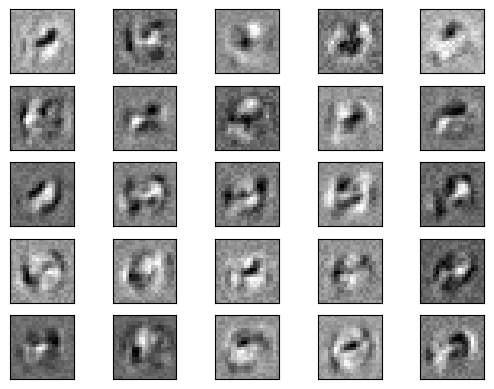

iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
         Current function value: 0.242081
         Iterations: 50
         Function evaluations: 117
         Gradient evaluations: 117
Training compleet. 
De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn 0.24208096766959006
Dit zou een stuk lager moeten zijn dan in het begin.
correct geclassificeerd: 4860
De huidige accu

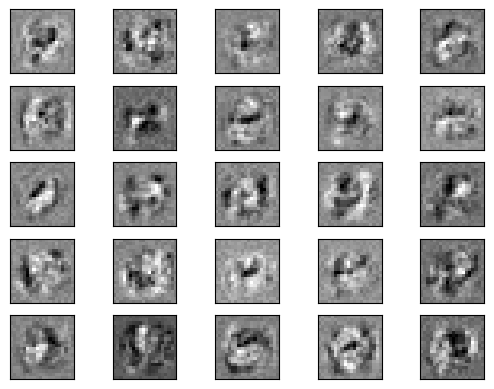

iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteration 78
iteration 79
iteration 80
iteration 81
iteration 82
iteration 83
iteration 84
iteration 85
iteration 86
iteration 87
iteration 88
iteration 89
iteration 90
iteration 91
iteration 92
iteration 93
iteration 94
iteration 95
iteration 96
iteration 97
iteration 98
iteration 99
iteration 100
iteration 101
iteration 102
iteration 103
iteration 104
iteration 105
iteration 106
iteration 107
iteration 108
iteration 109
iteration 110
iteration 111
iteration 112
iteration 113
iteration 114
iteration 115
iteration 116
iteration 117
iteration 118
iteration 119
iteration 120
iteration 121
iteration 122
iteration 123
iteration 124
iteration 125
iteration 126
iteration 127
iteration 128
iteration 129
iteration 130
iteration 131
iteration 132
iteration 133
iteration 134
iteration 135
iteration 136
iteration 137
iteration 138
iteration 139
iteration 140
iteration 141
iteration 142
iteration 143
iterati

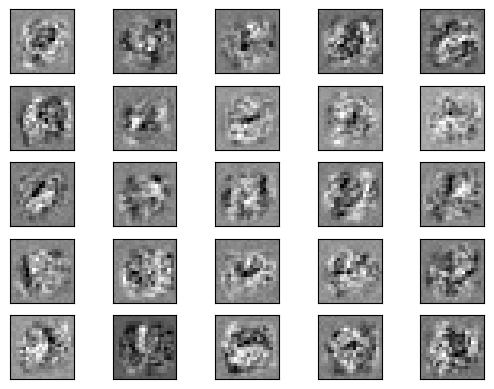

In [13]:
init_params = np.concatenate( (Theta1.flatten(), Theta2.flatten()) )
args = (X, y)
print ("")
print ("Gebruik scipy.optimize.minimize om het netwerk te trainen...")

def min_res(maximeterValue):
    res = minimize(nn_cost_function, init_params, args=args, method='CG', callback=callbackF, jac=True, options={'maxiter':maximeterValue,'disp':True})
    size = hidden_layer_size * (input_layer_size+1) #voor de bias-node die wel in de matrix zit maar niet geplot moet worden
    res_Theta1 = res['x'][:size].reshape(hidden_layer_size, input_layer_size+1)
    res_Theta2 = res['x'][size:].reshape(num_labels, hidden_layer_size+1)

    print ("Training compleet. ")

    cost = compute_cost(res_Theta1, res_Theta2, X, y) 
    print (f"De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn {cost}")
    print ("Dit zou een stuk lager moeten zijn dan in het begin.")

    pred = np.argmax(predict_number(res_Theta1,res_Theta2,X), axis=1)+1
    pred = pred.reshape(m,1)
    acc = np.count_nonzero([pred - y == 0])
    print (f"correct geclassificeerd: {acc}")
    print (f"De huidige accuratessse van het netwerk is {100 * acc/ m} %")
    print ("Dat zou een stuk hoger moeten zijn dan in het begin.")
    print ("Plotten van de waarden van de gewichten in de verborgen laag (hidden layer)")

    display_data(res_Theta1[:,1:]) 

min_res(20)
min_res(50)
min_res(100)